In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [30]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score          # k-겹 교차 검증 (5-겹)
from sklearn.model_selection import cross_validate           # 단순 점수 뿐 아니라 더 다양한 점수 반환 (dict 형)
from sklearn.model_selection import KFold                    # 교차 검증 분할기 (cross_val_score의 cv매개변수에 전달 -> 더 세밀한 제어)
from sklearn.model_selection import LeaveOneOut              # LOOCV
from sklearn.model_selection import ShuffleSplit             # 임의 분할 교차 검증
from sklearn.model_selection import GroupKFold               # 그룹별 교차 검증
from sklearn.model_selection import RepeatedStratifiedKFold  # tratifiedKFold(계층적 분할)를 여러 번 반복
from sklearn.model_selection import GridSearchCV             # 그리드 서치 (교차 검증)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [6]:
iris = load_iris()

In [66]:
logreg = LogisticRegression(max_iter=1000)

kfold = KFold(n_splits=3, shuffle=True, random_state=42)     # n_split값 조정해보기

scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

print('교차 검증 점수:')
for i in scores:
    print('\t', i)
print('평균 교차 점수:', scores.mean(), '\n')

res = cross_validate(logreg, iris.data, iris.target, return_train_score=True, cv=kfold)
res_df = pd.DataFrame(res)
print(res_df.mean())
#res_df

loo = LeaveOneOut()
scores2 = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('\nLOO 분할 횟수:', len(scores2), ' ', '데이터 수:', len(iris.data))
print(f'LOO 평균: {scores2.mean()}', '\n')

shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10, random_state=42)
scores3 = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('ShuffleSplit 점수:')
for i in scores3:
    print('\t', i)
print(f'ShuffleSplit 평균: {scores3.mean()}')

rskfold = RepeatedStratifiedKFold(random_state=42)
scores4 = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
print('\nRepeatedStratifiedKFold 교차 검증 횟수:', len(scores4))
print(f'RepeatedStratifiedKFold 평균: {scores4.mean()}')

교차 검증 점수:
	 1.0
	 0.92
	 0.98
평균 교차 점수: 0.9666666666666667 

fit_time       0.008770
score_time     0.000725
test_score     0.966667
train_score    0.976667
dtype: float64

LOO 분할 횟수: 150   데이터 수: 150
LOO 평균: 0.9666666666666667 

ShuffleSplit 점수:
	 1.0
	 0.9866666666666667
	 0.9466666666666667
	 0.9466666666666667
	 0.9333333333333333
	 0.96
	 0.96
	 0.9733333333333334
	 0.9733333333333334
	 0.92
ShuffleSplit 평균: 0.96

RepeatedStratifiedKFold 교차 검증 횟수: 50
RepeatedStratifiedKFold 평균: 0.9646666666666667


In [62]:
from sklearn.datasets import make_blobs

logreg = LogisticRegression(max_iter=1000)
X, y = make_blobs(n_samples=12, random_state=0)

gkf = GroupKFold(n_splits=3)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores =  cross_val_score(logreg, X, y, groups=groups, cv=gkf)
print('GroupKFold 점수 :', scores)

GroupKFold 점수 : [0.75       0.6        0.66666667]


In [20]:
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1, test_size=0.25)

print(X_train[0].shape, X_valid[0].shape, X_test[0].shape)

best_score = 0
best_score2 = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score2 = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma':gamma}
        if score2 > best_score2:
            best_score2 = score2
            best_parameters2 = {'C': C, 'gamma':gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

svm = SVC(**best_parameters2)
svm.fit(X_trainval, y_trainval)
test_score2 = svm.score(X_test, y_test)

print('최고 점수:', best_score)
print('최적 매개변수:', best_parameters)
print('훈련 점수:', svm.score(X_trainval, y_trainval))
print('테스트 점수:', test_score)
print()
print('교차 검증 최고 점수:', best_score2)
print('교차 검증 최적 매개변수:', best_parameters2)
print('교차 검증 훈련 점수:', svm.score(X_trainval, y_trainval))
print('교차 검증 테스트 점수:', test_score2)

(4,) (4,) (4,)
최고 점수: 0.9642857142857143
최적 매개변수: {'C': 10, 'gamma': 0.001}
훈련 점수: 0.9910714285714286
테스트 점수: 0.9210526315789473

교차 검증 최고 점수: 0.9731225296442687
교차 검증 최적 매개변수: {'C': 10, 'gamma': 0.1}
교차 검증 훈련 점수: 0.9910714285714286
교차 검증 테스트 점수: 0.9736842105263158


테스트 점수: 0.9736842105263158
최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 점수: 0.990909090909091
최고 성능 모델: SVC(C=100, gamma=0.01)


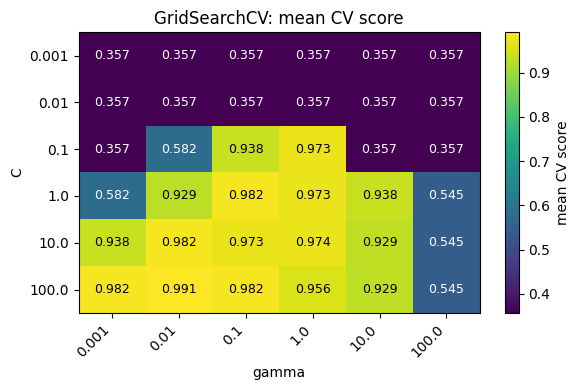

In [47]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=48, test_size=0.25)

grid_search.fit(X_train, y_train)

print('테스트 점수:', grid_search.score(X_test, y_test))
print('최적 매개변수:', grid_search.best_params_)
print('최고 점수:', grid_search.best_score_)
print('최고 성능 모델:', grid_search.best_estimator_)

pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
#np.transpose(results.head())

scores = np.array(results["mean_test_score"]).reshape(6, 6)

# GridSearchCV 결과를 C x gamma 매트릭스로 피벗
table = results.pivot(index="param_C", columns="param_gamma", values="mean_test_score").astype(float)

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(table.values, aspect="auto")  # cmap은 기본값 사용해도 OK
cbar = fig.colorbar(im, ax=ax, label="mean CV score")

# 축/라벨
ax.set_xticks(np.arange(len(table.columns)))
ax.set_yticks(np.arange(len(table.index)))
ax.set_xticklabels([str(g) for g in table.columns], rotation=45, ha="right")
ax.set_yticklabels([str(c) for c in table.index])
ax.set_xlabel("gamma")
ax.set_ylabel("C")
ax.set_title("GridSearchCV: mean CV score")

# 각 셀에 값 적기 (가독성 위해 배경 밝기에 따라 글자색 변경)
vals = table.values
vmin, vmax = np.nanmin(vals), np.nanmax(vals)
thr = (vmin + vmax) / 2.0
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        color = "white" if vals[i, j] < thr else "black"
        ax.text(j, i, f"{vals[i, j]:.3f}", ha="center", va="center", color=color, fontsize=9)

plt.tight_layout()
plt.show()

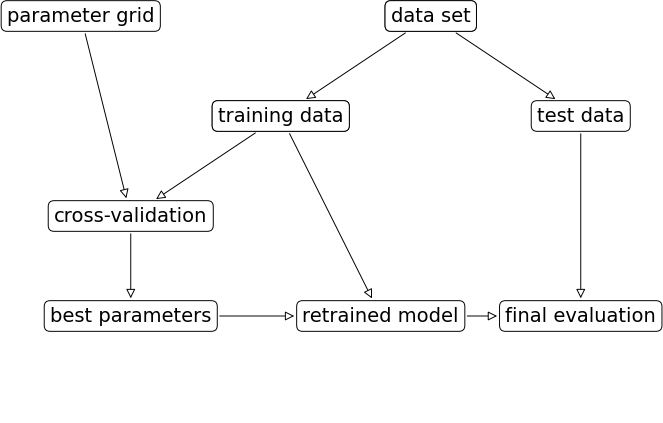

In [25]:
mglearn.plots.plot_grid_search_overview()

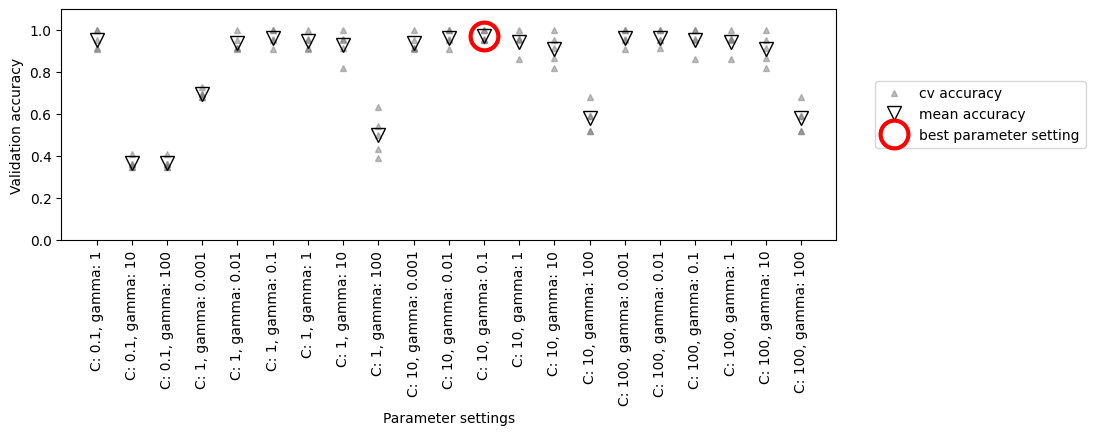

In [24]:
mglearn.plots.plot_cross_val_selection()

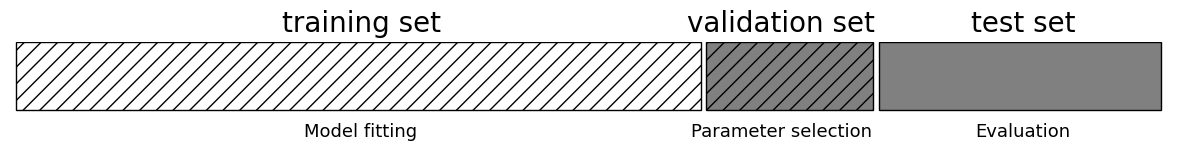

In [72]:
mglearn.plots.plot_threefold_split()

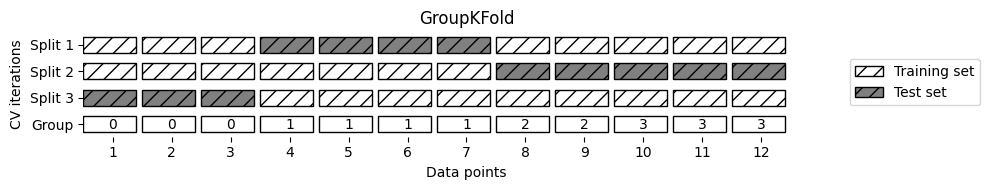

In [45]:
mglearn.plots.plot_group_kfold()

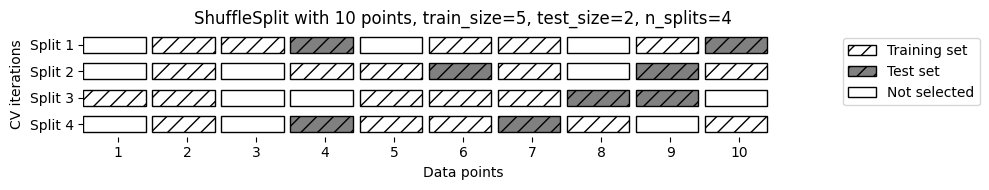

In [37]:
mglearn.plots.plot_shuffle_split()

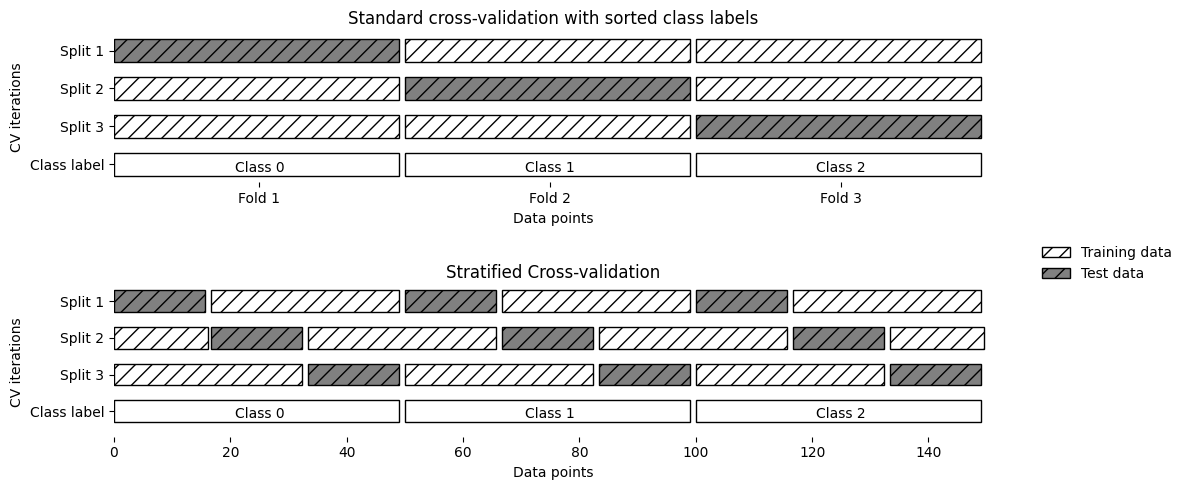

In [22]:
mglearn.plots.plot_stratified_cross_validation()

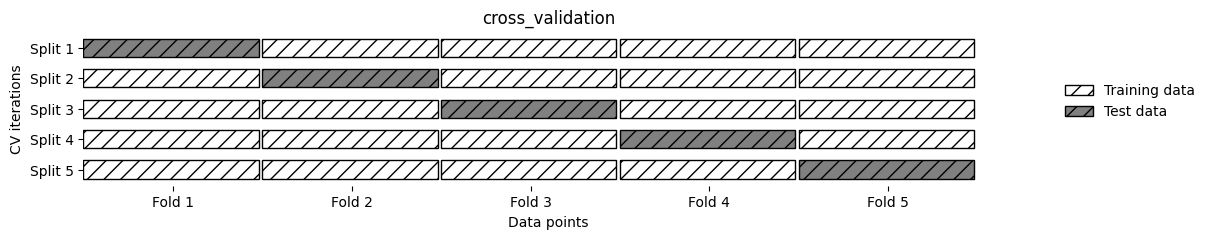

In [7]:
mglearn.plots.plot_cross_validation()